# importing required libraries


In [1]:
import pixellib
from pixellib.tune_bg import alter_bg
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

# loading given images 

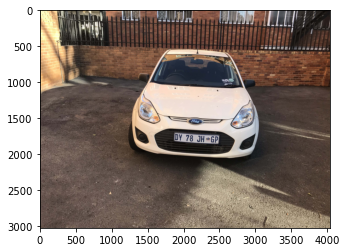

In [2]:
image1=Image.open('view1.jpeg')
image2=Image.open('view4.jpeg')
plt.imshow(image1)

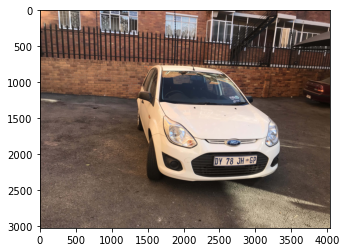

In [3]:
plt.imshow(image2)

In [4]:
change_bg = alter_bg()
change_bg.load_pascalvoc_model("deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")

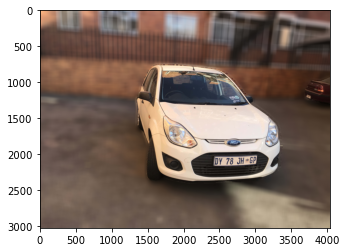

In [9]:
change_bg.blur_bg('view4.jpeg',extreme=True,output_image_name="blur4.jpeg")
plt.imshow(Image.open('blur4.jpeg'))

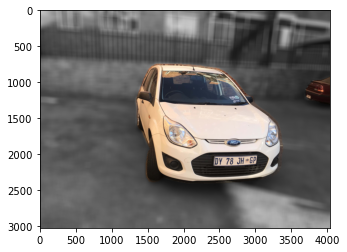

In [10]:
change_bg.gray_bg('blur4.jpeg',output_image_name="gray4.jpeg")
plt.imshow(Image.open('gray4.jpeg'))

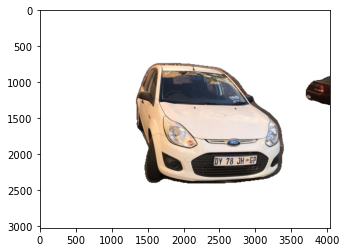

In [11]:
change_bg.color_bg("gray4.jpeg", colors = (255, 255, 255), output_image_name="img1.jpeg")
plt.imshow(Image.open('img1.jpeg'))

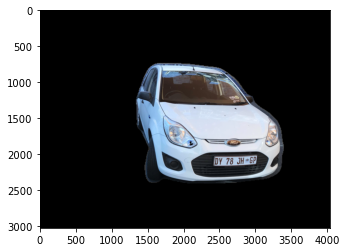

In [12]:
img = cv2.imread('img1.jpeg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (1000,500,2500,2500)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)

In [13]:
img3 = Image.fromarray(img, 'RGB')
img3.save('test.jpeg')

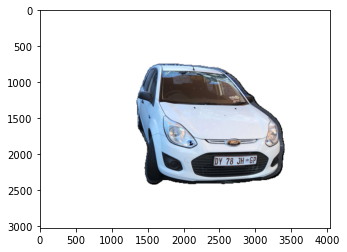

In [14]:
change_bg.color_bg('test.jpeg', colors = (255, 255, 255), output_image_name="output4.jpeg",detect = "car")
plt.imshow(Image.open('output4.jpeg'))

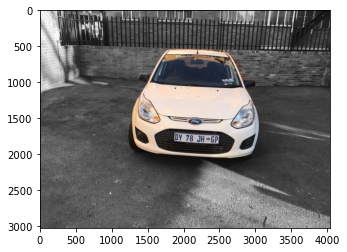

In [22]:
change_bg.gray_bg('view1.jpeg',output_image_name="gray1.jpeg")
plt.imshow(Image.open('gray1.jpeg'))

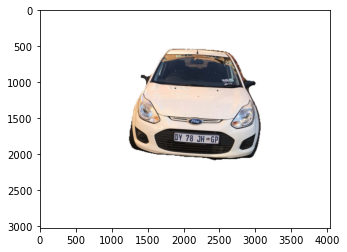

In [24]:
change_bg.color_bg("gray1.jpeg", colors = (255, 255, 255), output_image_name="output1.jpeg",detect = "car")
plt.imshow(Image.open('output1.jpeg'))